In [3]:
import re

file_path = 'yahoo_answers.txt'

learning_rates = []
dimensions = []
epochs = []
ngrams = []
precision_at_1 = []

pattern = re.compile(r"lr=(\d+\.?\d*), dim=(\d+), epoch=(\d+), and wordNgrams=(\d+)")
precision_pattern = re.compile(r"P@1\s+(\d+\.\d+)")

with open(file_path, 'r') as file:
    content = file.read()

blocks = content.split("Training model")

for block in blocks:
    if block.strip() == "":
        continue
    
    params_match = pattern.search(block)
    if params_match:
        lr, dim, epoch, ngram = params_match.groups()
        learning_rates.append(float(lr))
        dimensions.append(int(dim))
        epochs.append(int(epoch))
        ngrams.append(int(ngram))

    precision_match = precision_pattern.search(block)
    if precision_match:
        p_at_1 = precision_match.group(1)
        precision_at_1.append(float(p_at_1))

print("Learning Rates:", learning_rates)
print("Dimensions:", dimensions)
print("Epochs:", epochs)
print("Word N-grams:", ngrams)
print("Precision@1:", precision_at_1)
print(len(learning_rates), len(dimensions), len(epochs), len(ngrams), len(precision_at_1))


Learning Rates: [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
Dimensions: [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 25, 25, 25

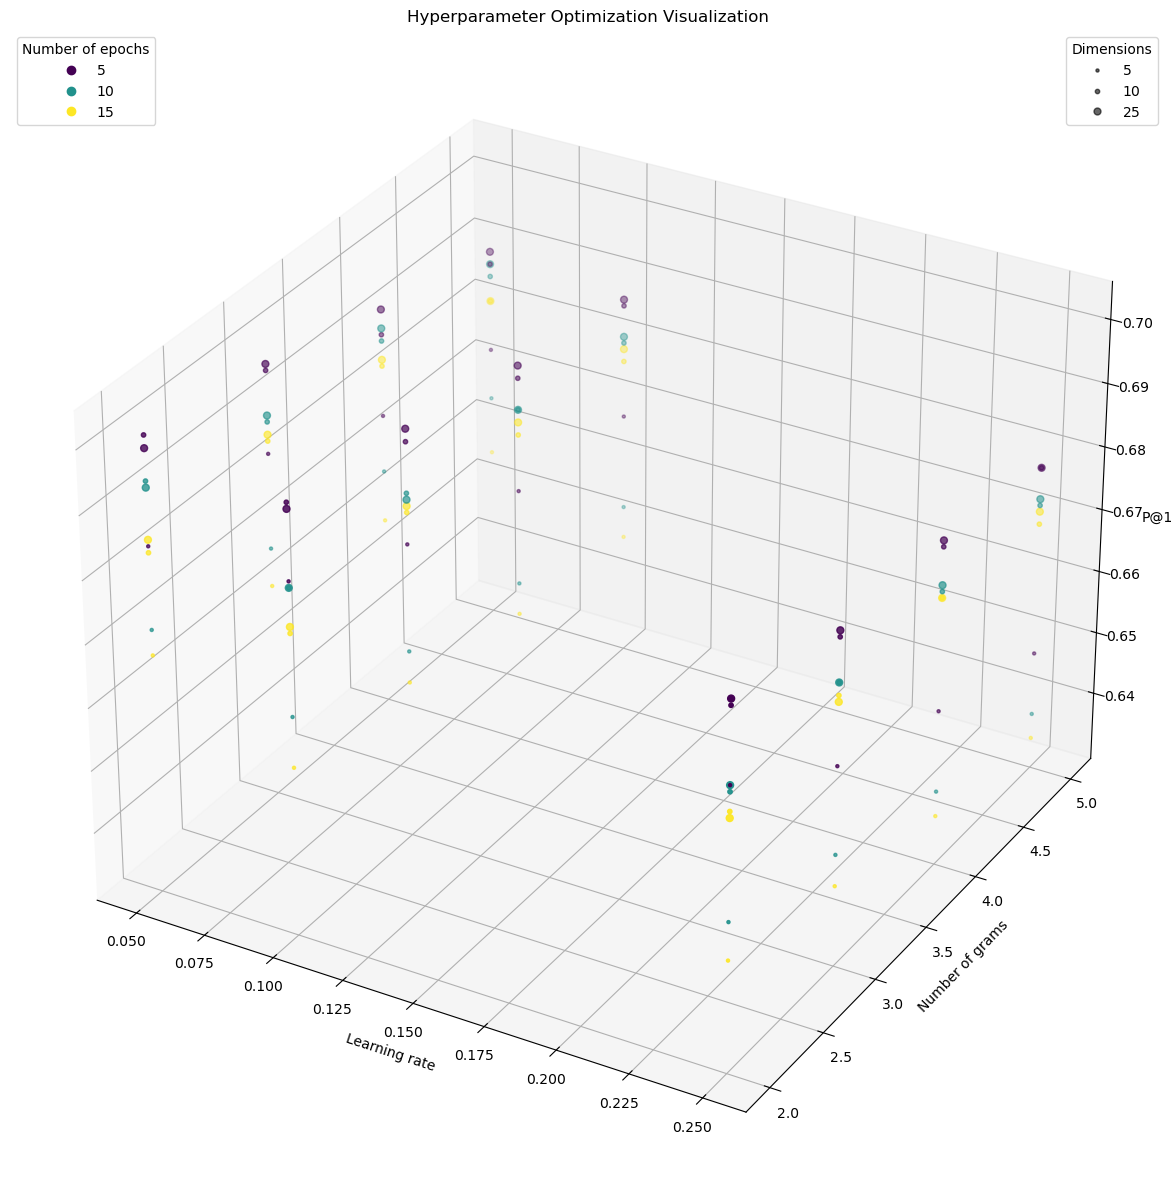

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(learning_rates, ngrams, precision_at_1, c=epochs, s=dimensions)

handles, labels = scatter.legend_elements(prop='colors')
legend1 = ax.legend(handles, labels, loc='upper left', title='Number of epochs')
ax.add_artist(legend1)

handles2, labels2 = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles2, labels2, loc='upper right', title='Dimensions')

ax.set_xlabel('Learning rate')
ax.set_ylabel('Number of grams')
ax.set_zlabel('P@1')

plt.title('Hyperparameter Optimization Visualization')
plt.show()
